## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 


In [3]:
n_features = 13
n_samples= 506
n_target = 1 
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.747
Model:                            OLS   Adj. R-squared (uncentered):              0.738
Method:                 Least Squares   F-statistic:                              88.57
Date:                Tue, 17 May 2022   Prob (F-statistic):                   9.20e-108
Time:                        20:21:07   Log-Likelihood:                         -290.31
No. Observations:                 404   AIC:                                      606.6
Df Residuals:                     391   BIC:                                      658.6
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

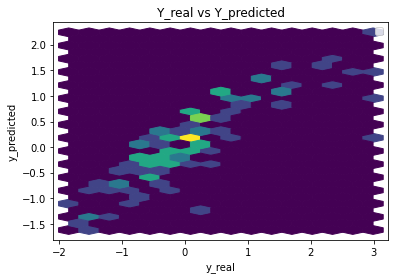

Performance Metrics
Mean Squared Error: 0.3170489525417334
Mean Absolute Error: 0.3846877234231575
Manhattan distance: 39.23814778916207
Euclidean distance: 5.686738358607402


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)
print(mae_cb)

Learning rate set to 0.033215


0:	learn: 0.9653441	total: 56.5ms	remaining: 56.4s
1:	learn: 0.9464629	total: 57.5ms	remaining: 28.7s
2:	learn: 0.9272325	total: 58.5ms	remaining: 19.4s
3:	learn: 0.9113786	total: 59.5ms	remaining: 14.8s
4:	learn: 0.8936845	total: 60.7ms	remaining: 12.1s
5:	learn: 0.8785955	total: 61.7ms	remaining: 10.2s
6:	learn: 0.8619260	total: 62.6ms	remaining: 8.88s
7:	learn: 0.8452673	total: 63.5ms	remaining: 7.87s
8:	learn: 0.8306397	total: 64.3ms	remaining: 7.08s
9:	learn: 0.8138586	total: 65.2ms	remaining: 6.45s
10:	learn: 0.7995282	total: 66ms	remaining: 5.94s
11:	learn: 0.7865993	total: 66.9ms	remaining: 5.51s
12:	learn: 0.7726528	total: 67.7ms	remaining: 5.14s
13:	learn: 0.7578251	total: 68.6ms	remaining: 4.83s
14:	learn: 0.7448702	total: 69.4ms	remaining: 4.56s
15:	learn: 0.7303633	total: 70.3ms	remaining: 4.32s
16:	learn: 0.7187703	total: 71.3ms	remaining: 4.12s
17:	learn: 0.7061757	total: 72ms	remaining: 3.93s
18:	learn: 0.6947384	total: 72.8ms	remaining: 3.76s
19:	learn: 0.6835027	total

21:	learn: 0.6607338	total: 75.4ms	remaining: 3.35s
22:	learn: 0.6498726	total: 76.3ms	remaining: 3.24s
23:	learn: 0.6406646	total: 77.3ms	remaining: 3.14s
24:	learn: 0.6311285	total: 78ms	remaining: 3.04s
25:	learn: 0.6226373	total: 78.8ms	remaining: 2.95s
26:	learn: 0.6142971	total: 79.6ms	remaining: 2.87s
27:	learn: 0.6058618	total: 80.3ms	remaining: 2.79s
28:	learn: 0.5973895	total: 81.1ms	remaining: 2.71s
29:	learn: 0.5879310	total: 81.8ms	remaining: 2.65s
30:	learn: 0.5786623	total: 82.8ms	remaining: 2.59s
31:	learn: 0.5703526	total: 83.5ms	remaining: 2.52s
32:	learn: 0.5637895	total: 84.3ms	remaining: 2.47s
33:	learn: 0.5566605	total: 85ms	remaining: 2.42s
34:	learn: 0.5497708	total: 85.9ms	remaining: 2.37s
35:	learn: 0.5426664	total: 86.8ms	remaining: 2.32s
36:	learn: 0.5363403	total: 87.6ms	remaining: 2.28s
37:	learn: 0.5285754	total: 88.4ms	remaining: 2.24s
38:	learn: 0.5218221	total: 89.2ms	remaining: 2.2s
39:	learn: 0.5149326	total: 89.9ms	remaining: 2.16s
40:	learn: 0.5093

122:	learn: 0.2819758	total: 159ms	remaining: 1.13s
123:	learn: 0.2811412	total: 160ms	remaining: 1.13s
124:	learn: 0.2801419	total: 161ms	remaining: 1.12s
125:	learn: 0.2789791	total: 162ms	remaining: 1.12s
126:	learn: 0.2778171	total: 163ms	remaining: 1.12s
127:	learn: 0.2768906	total: 163ms	remaining: 1.11s
128:	learn: 0.2757548	total: 164ms	remaining: 1.11s
129:	learn: 0.2742721	total: 165ms	remaining: 1.1s
130:	learn: 0.2729700	total: 166ms	remaining: 1.1s
131:	learn: 0.2722235	total: 167ms	remaining: 1.09s
132:	learn: 0.2713263	total: 167ms	remaining: 1.09s
133:	learn: 0.2703222	total: 168ms	remaining: 1.09s
134:	learn: 0.2692766	total: 169ms	remaining: 1.08s
135:	learn: 0.2683473	total: 170ms	remaining: 1.08s
136:	learn: 0.2670825	total: 171ms	remaining: 1.07s
137:	learn: 0.2662059	total: 171ms	remaining: 1.07s
138:	learn: 0.2653661	total: 172ms	remaining: 1.07s
139:	learn: 0.2643760	total: 173ms	remaining: 1.06s
140:	learn: 0.2634646	total: 174ms	remaining: 1.06s
141:	learn: 0.

162:	learn: 0.2469240	total: 192ms	remaining: 987ms
163:	learn: 0.2458322	total: 193ms	remaining: 985ms
164:	learn: 0.2451382	total: 194ms	remaining: 981ms
165:	learn: 0.2444962	total: 195ms	remaining: 979ms
166:	learn: 0.2440129	total: 196ms	remaining: 976ms
167:	learn: 0.2432293	total: 197ms	remaining: 973ms
168:	learn: 0.2424970	total: 197ms	remaining: 971ms
169:	learn: 0.2417993	total: 198ms	remaining: 968ms
170:	learn: 0.2410000	total: 199ms	remaining: 965ms
171:	learn: 0.2400792	total: 200ms	remaining: 962ms
172:	learn: 0.2394799	total: 201ms	remaining: 959ms
173:	learn: 0.2388763	total: 201ms	remaining: 956ms
174:	learn: 0.2382209	total: 202ms	remaining: 953ms
175:	learn: 0.2376154	total: 203ms	remaining: 950ms
176:	learn: 0.2366923	total: 204ms	remaining: 948ms
177:	learn: 0.2361194	total: 205ms	remaining: 946ms
178:	learn: 0.2352082	total: 206ms	remaining: 943ms
179:	learn: 0.2343895	total: 207ms	remaining: 941ms
180:	learn: 0.2336129	total: 207ms	remaining: 938ms
181:	learn: 

224:	learn: 0.2072349	total: 246ms	remaining: 847ms
225:	learn: 0.2067745	total: 247ms	remaining: 845ms
226:	learn: 0.2060535	total: 248ms	remaining: 843ms
227:	learn: 0.2056311	total: 248ms	remaining: 841ms
228:	learn: 0.2052724	total: 250ms	remaining: 841ms
229:	learn: 0.2046674	total: 251ms	remaining: 840ms
230:	learn: 0.2043876	total: 252ms	remaining: 838ms
231:	learn: 0.2038493	total: 253ms	remaining: 836ms
232:	learn: 0.2033535	total: 253ms	remaining: 834ms
233:	learn: 0.2028075	total: 254ms	remaining: 832ms
234:	learn: 0.2025311	total: 255ms	remaining: 830ms
235:	learn: 0.2021094	total: 256ms	remaining: 829ms
236:	learn: 0.2017736	total: 257ms	remaining: 826ms
237:	learn: 0.2012959	total: 257ms	remaining: 824ms
238:	learn: 0.2008549	total: 258ms	remaining: 823ms
239:	learn: 0.2004922	total: 259ms	remaining: 821ms
240:	learn: 0.2000774	total: 260ms	remaining: 819ms
241:	learn: 0.1997606	total: 261ms	remaining: 817ms
242:	learn: 0.1995126	total: 262ms	remaining: 815ms
243:	learn: 

247:	learn: 0.1975152	total: 266ms	remaining: 806ms
248:	learn: 0.1971001	total: 267ms	remaining: 805ms
249:	learn: 0.1968663	total: 268ms	remaining: 805ms
250:	learn: 0.1965209	total: 269ms	remaining: 803ms
251:	learn: 0.1959150	total: 270ms	remaining: 802ms
252:	learn: 0.1952905	total: 271ms	remaining: 800ms
253:	learn: 0.1947661	total: 272ms	remaining: 799ms
254:	learn: 0.1943005	total: 273ms	remaining: 797ms
255:	learn: 0.1940661	total: 274ms	remaining: 796ms
256:	learn: 0.1934948	total: 275ms	remaining: 794ms
257:	learn: 0.1930017	total: 276ms	remaining: 793ms
258:	learn: 0.1925725	total: 276ms	remaining: 791ms
259:	learn: 0.1923369	total: 277ms	remaining: 789ms
260:	learn: 0.1918433	total: 278ms	remaining: 788ms
261:	learn: 0.1914352	total: 279ms	remaining: 786ms
262:	learn: 0.1906842	total: 280ms	remaining: 784ms
263:	learn: 0.1903196	total: 281ms	remaining: 783ms
264:	learn: 0.1897624	total: 282ms	remaining: 781ms
265:	learn: 0.1890641	total: 282ms	remaining: 779ms
266:	learn: 

345:	learn: 0.1602346	total: 350ms	remaining: 661ms
346:	learn: 0.1598825	total: 350ms	remaining: 659ms
347:	learn: 0.1595658	total: 351ms	remaining: 658ms
348:	learn: 0.1591699	total: 352ms	remaining: 657ms
349:	learn: 0.1587161	total: 353ms	remaining: 656ms
350:	learn: 0.1582728	total: 354ms	remaining: 654ms
351:	learn: 0.1577951	total: 355ms	remaining: 653ms
352:	learn: 0.1576415	total: 356ms	remaining: 652ms
353:	learn: 0.1572826	total: 357ms	remaining: 651ms
354:	learn: 0.1572462	total: 358ms	remaining: 650ms
355:	learn: 0.1568562	total: 358ms	remaining: 648ms
356:	learn: 0.1564000	total: 359ms	remaining: 647ms
357:	learn: 0.1561280	total: 360ms	remaining: 645ms
358:	learn: 0.1556658	total: 361ms	remaining: 644ms
359:	learn: 0.1554289	total: 362ms	remaining: 643ms
360:	learn: 0.1551174	total: 362ms	remaining: 642ms
361:	learn: 0.1548460	total: 363ms	remaining: 640ms
362:	learn: 0.1546371	total: 364ms	remaining: 639ms
363:	learn: 0.1543069	total: 365ms	remaining: 638ms
364:	learn: 

384:	learn: 0.1482560	total: 383ms	remaining: 611ms
385:	learn: 0.1479691	total: 384ms	remaining: 610ms
386:	learn: 0.1479292	total: 384ms	remaining: 609ms
387:	learn: 0.1475289	total: 385ms	remaining: 608ms
388:	learn: 0.1471658	total: 386ms	remaining: 606ms
389:	learn: 0.1467147	total: 387ms	remaining: 605ms
390:	learn: 0.1464167	total: 388ms	remaining: 604ms
391:	learn: 0.1460646	total: 389ms	remaining: 603ms
392:	learn: 0.1459018	total: 389ms	remaining: 601ms
393:	learn: 0.1455186	total: 390ms	remaining: 600ms
394:	learn: 0.1451715	total: 391ms	remaining: 599ms
395:	learn: 0.1448658	total: 392ms	remaining: 598ms
396:	learn: 0.1445249	total: 393ms	remaining: 596ms
397:	learn: 0.1442485	total: 393ms	remaining: 595ms
398:	learn: 0.1439731	total: 394ms	remaining: 594ms
399:	learn: 0.1436696	total: 395ms	remaining: 593ms
400:	learn: 0.1433843	total: 396ms	remaining: 591ms
401:	learn: 0.1429414	total: 397ms	remaining: 590ms
402:	learn: 0.1427319	total: 397ms	remaining: 589ms
403:	learn: 

447:	learn: 0.1313946	total: 436ms	remaining: 537ms
448:	learn: 0.1310362	total: 437ms	remaining: 536ms
449:	learn: 0.1310045	total: 438ms	remaining: 535ms
450:	learn: 0.1308285	total: 439ms	remaining: 534ms
451:	learn: 0.1305259	total: 440ms	remaining: 533ms
452:	learn: 0.1304779	total: 441ms	remaining: 532ms
453:	learn: 0.1302263	total: 442ms	remaining: 531ms
454:	learn: 0.1300043	total: 443ms	remaining: 530ms
455:	learn: 0.1299524	total: 443ms	remaining: 529ms
456:	learn: 0.1297485	total: 444ms	remaining: 528ms
457:	learn: 0.1297182	total: 445ms	remaining: 527ms
458:	learn: 0.1294212	total: 446ms	remaining: 525ms
459:	learn: 0.1293941	total: 447ms	remaining: 524ms
460:	learn: 0.1292342	total: 447ms	remaining: 523ms
461:	learn: 0.1289893	total: 448ms	remaining: 522ms
462:	learn: 0.1288291	total: 449ms	remaining: 521ms
463:	learn: 0.1287914	total: 450ms	remaining: 520ms
464:	learn: 0.1286036	total: 451ms	remaining: 519ms
465:	learn: 0.1283363	total: 451ms	remaining: 517ms
466:	learn: 

471:	learn: 0.1272696	total: 456ms	remaining: 510ms
472:	learn: 0.1269523	total: 457ms	remaining: 509ms
473:	learn: 0.1266835	total: 458ms	remaining: 508ms
474:	learn: 0.1263780	total: 459ms	remaining: 507ms
475:	learn: 0.1261319	total: 460ms	remaining: 506ms
476:	learn: 0.1259289	total: 461ms	remaining: 505ms
477:	learn: 0.1256887	total: 462ms	remaining: 504ms
478:	learn: 0.1256489	total: 462ms	remaining: 503ms
479:	learn: 0.1253329	total: 463ms	remaining: 502ms
480:	learn: 0.1250185	total: 464ms	remaining: 501ms
481:	learn: 0.1249837	total: 465ms	remaining: 500ms
482:	learn: 0.1248223	total: 466ms	remaining: 498ms
483:	learn: 0.1245895	total: 467ms	remaining: 497ms
484:	learn: 0.1243799	total: 467ms	remaining: 496ms
485:	learn: 0.1241605	total: 468ms	remaining: 495ms
486:	learn: 0.1240574	total: 469ms	remaining: 494ms
487:	learn: 0.1238474	total: 470ms	remaining: 493ms
488:	learn: 0.1238238	total: 471ms	remaining: 492ms
489:	learn: 0.1235193	total: 471ms	remaining: 491ms
490:	learn: 

571:	learn: 0.1074991	total: 540ms	remaining: 404ms
572:	learn: 0.1073747	total: 541ms	remaining: 403ms
573:	learn: 0.1072241	total: 542ms	remaining: 402ms
574:	learn: 0.1069968	total: 543ms	remaining: 401ms
575:	learn: 0.1069555	total: 544ms	remaining: 400ms
576:	learn: 0.1067036	total: 544ms	remaining: 399ms
577:	learn: 0.1066564	total: 545ms	remaining: 398ms
578:	learn: 0.1065402	total: 546ms	remaining: 397ms
579:	learn: 0.1063584	total: 547ms	remaining: 396ms
580:	learn: 0.1061474	total: 548ms	remaining: 395ms
581:	learn: 0.1061186	total: 549ms	remaining: 394ms
582:	learn: 0.1058568	total: 549ms	remaining: 393ms
583:	learn: 0.1056514	total: 550ms	remaining: 392ms
584:	learn: 0.1055176	total: 551ms	remaining: 391ms
585:	learn: 0.1053293	total: 552ms	remaining: 390ms
586:	learn: 0.1051440	total: 553ms	remaining: 389ms
587:	learn: 0.1051247	total: 554ms	remaining: 388ms
588:	learn: 0.1049341	total: 554ms	remaining: 387ms
589:	learn: 0.1047255	total: 555ms	remaining: 386ms
590:	learn: 

611:	learn: 0.1012356	total: 573ms	remaining: 363ms
612:	learn: 0.1009906	total: 574ms	remaining: 363ms
613:	learn: 0.1008653	total: 575ms	remaining: 362ms
614:	learn: 0.1007407	total: 576ms	remaining: 361ms
615:	learn: 0.1005557	total: 577ms	remaining: 360ms
616:	learn: 0.1003798	total: 578ms	remaining: 359ms
617:	learn: 0.1003604	total: 579ms	remaining: 358ms
618:	learn: 0.1001668	total: 579ms	remaining: 357ms
619:	learn: 0.0999242	total: 580ms	remaining: 356ms
620:	learn: 0.0996356	total: 581ms	remaining: 355ms
621:	learn: 0.0994681	total: 582ms	remaining: 354ms
622:	learn: 0.0993170	total: 583ms	remaining: 353ms
623:	learn: 0.0991049	total: 583ms	remaining: 352ms
624:	learn: 0.0989444	total: 584ms	remaining: 350ms
625:	learn: 0.0988196	total: 585ms	remaining: 349ms
626:	learn: 0.0986545	total: 586ms	remaining: 348ms
627:	learn: 0.0984554	total: 587ms	remaining: 348ms
628:	learn: 0.0982094	total: 588ms	remaining: 347ms
629:	learn: 0.0980165	total: 588ms	remaining: 346ms
630:	learn: 

675:	learn: 0.0913155	total: 626ms	remaining: 300ms
676:	learn: 0.0910754	total: 627ms	remaining: 299ms
677:	learn: 0.0909442	total: 628ms	remaining: 298ms
678:	learn: 0.0908363	total: 629ms	remaining: 297ms
679:	learn: 0.0906705	total: 630ms	remaining: 296ms
680:	learn: 0.0905129	total: 631ms	remaining: 295ms
681:	learn: 0.0902836	total: 631ms	remaining: 294ms
682:	learn: 0.0901345	total: 632ms	remaining: 294ms
683:	learn: 0.0900442	total: 633ms	remaining: 293ms
684:	learn: 0.0899823	total: 634ms	remaining: 292ms
685:	learn: 0.0898368	total: 635ms	remaining: 291ms
686:	learn: 0.0896676	total: 636ms	remaining: 290ms
687:	learn: 0.0894543	total: 637ms	remaining: 289ms
688:	learn: 0.0892261	total: 638ms	remaining: 288ms
689:	learn: 0.0890584	total: 638ms	remaining: 287ms
690:	learn: 0.0889305	total: 639ms	remaining: 286ms
691:	learn: 0.0886764	total: 640ms	remaining: 285ms
692:	learn: 0.0884405	total: 641ms	remaining: 284ms
693:	learn: 0.0883778	total: 642ms	remaining: 283ms
694:	learn: 

699:	learn: 0.0878538	total: 647ms	remaining: 277ms
700:	learn: 0.0876684	total: 648ms	remaining: 276ms
701:	learn: 0.0875096	total: 648ms	remaining: 275ms
702:	learn: 0.0872520	total: 649ms	remaining: 274ms
703:	learn: 0.0870878	total: 650ms	remaining: 273ms
704:	learn: 0.0869860	total: 651ms	remaining: 272ms
705:	learn: 0.0868453	total: 652ms	remaining: 271ms
706:	learn: 0.0866588	total: 653ms	remaining: 270ms
707:	learn: 0.0865468	total: 653ms	remaining: 269ms
708:	learn: 0.0864591	total: 654ms	remaining: 269ms
709:	learn: 0.0862776	total: 655ms	remaining: 268ms
710:	learn: 0.0861607	total: 656ms	remaining: 267ms
711:	learn: 0.0859703	total: 657ms	remaining: 266ms
712:	learn: 0.0858093	total: 658ms	remaining: 265ms
713:	learn: 0.0857522	total: 659ms	remaining: 264ms
714:	learn: 0.0856227	total: 659ms	remaining: 263ms
715:	learn: 0.0854035	total: 660ms	remaining: 262ms
716:	learn: 0.0852527	total: 661ms	remaining: 261ms
717:	learn: 0.0851597	total: 662ms	remaining: 260ms
718:	learn: 

800:	learn: 0.0759221	total: 730ms	remaining: 181ms
801:	learn: 0.0757723	total: 731ms	remaining: 181ms
802:	learn: 0.0756565	total: 732ms	remaining: 180ms
803:	learn: 0.0756320	total: 733ms	remaining: 179ms
804:	learn: 0.0754920	total: 734ms	remaining: 178ms
805:	learn: 0.0753227	total: 734ms	remaining: 177ms
806:	learn: 0.0751818	total: 735ms	remaining: 176ms
807:	learn: 0.0750459	total: 736ms	remaining: 175ms
808:	learn: 0.0749348	total: 737ms	remaining: 174ms
809:	learn: 0.0748278	total: 738ms	remaining: 173ms
810:	learn: 0.0747480	total: 738ms	remaining: 172ms
811:	learn: 0.0746763	total: 739ms	remaining: 171ms
812:	learn: 0.0745720	total: 740ms	remaining: 170ms
813:	learn: 0.0744488	total: 741ms	remaining: 169ms
814:	learn: 0.0743934	total: 742ms	remaining: 168ms
815:	learn: 0.0742787	total: 743ms	remaining: 167ms
816:	learn: 0.0741821	total: 743ms	remaining: 167ms
817:	learn: 0.0740846	total: 744ms	remaining: 166ms
818:	learn: 0.0739176	total: 745ms	remaining: 165ms
819:	learn: 

839:	learn: 0.0719285	total: 763ms	remaining: 145ms
840:	learn: 0.0717778	total: 764ms	remaining: 144ms
841:	learn: 0.0716492	total: 765ms	remaining: 143ms
842:	learn: 0.0715167	total: 765ms	remaining: 143ms
843:	learn: 0.0714505	total: 766ms	remaining: 142ms
844:	learn: 0.0713036	total: 767ms	remaining: 141ms
845:	learn: 0.0712892	total: 768ms	remaining: 140ms
846:	learn: 0.0711698	total: 769ms	remaining: 139ms
847:	learn: 0.0710646	total: 770ms	remaining: 138ms
848:	learn: 0.0709284	total: 770ms	remaining: 137ms
849:	learn: 0.0708131	total: 771ms	remaining: 136ms
850:	learn: 0.0707984	total: 772ms	remaining: 135ms
851:	learn: 0.0706497	total: 773ms	remaining: 134ms
852:	learn: 0.0705449	total: 774ms	remaining: 133ms
853:	learn: 0.0704507	total: 774ms	remaining: 132ms
854:	learn: 0.0703602	total: 775ms	remaining: 131ms
855:	learn: 0.0703086	total: 776ms	remaining: 131ms
856:	learn: 0.0702438	total: 777ms	remaining: 130ms
857:	learn: 0.0701243	total: 778ms	remaining: 129ms
858:	learn: 

903:	learn: 0.0657210	total: 816ms	remaining: 86.6ms
904:	learn: 0.0656666	total: 817ms	remaining: 85.7ms
905:	learn: 0.0655452	total: 817ms	remaining: 84.8ms
906:	learn: 0.0654470	total: 818ms	remaining: 83.9ms
907:	learn: 0.0653753	total: 819ms	remaining: 83ms
908:	learn: 0.0652925	total: 820ms	remaining: 82.1ms
909:	learn: 0.0651811	total: 821ms	remaining: 81.2ms
910:	learn: 0.0650983	total: 822ms	remaining: 80.3ms
911:	learn: 0.0649912	total: 823ms	remaining: 79.4ms
912:	learn: 0.0649682	total: 823ms	remaining: 78.5ms
913:	learn: 0.0648818	total: 824ms	remaining: 77.5ms
914:	learn: 0.0647890	total: 825ms	remaining: 76.6ms
915:	learn: 0.0647736	total: 826ms	remaining: 75.7ms
916:	learn: 0.0647112	total: 827ms	remaining: 74.8ms
917:	learn: 0.0646959	total: 827ms	remaining: 73.9ms
918:	learn: 0.0645903	total: 828ms	remaining: 73ms
919:	learn: 0.0645307	total: 829ms	remaining: 72.1ms
920:	learn: 0.0644244	total: 830ms	remaining: 71.2ms
921:	learn: 0.0643011	total: 830ms	remaining: 70.3

928:	learn: 0.0637377	total: 836ms	remaining: 63.9ms
929:	learn: 0.0636689	total: 837ms	remaining: 63ms
930:	learn: 0.0636088	total: 838ms	remaining: 62.1ms
931:	learn: 0.0634933	total: 839ms	remaining: 61.2ms
932:	learn: 0.0633845	total: 840ms	remaining: 60.3ms
933:	learn: 0.0633532	total: 840ms	remaining: 59.4ms
934:	learn: 0.0632311	total: 841ms	remaining: 58.5ms
935:	learn: 0.0631249	total: 842ms	remaining: 57.6ms
936:	learn: 0.0630324	total: 843ms	remaining: 56.7ms
937:	learn: 0.0629090	total: 843ms	remaining: 55.7ms
938:	learn: 0.0628456	total: 844ms	remaining: 54.8ms
939:	learn: 0.0626925	total: 845ms	remaining: 53.9ms
940:	learn: 0.0626377	total: 846ms	remaining: 53ms
941:	learn: 0.0625846	total: 847ms	remaining: 52.1ms
942:	learn: 0.0624855	total: 848ms	remaining: 51.2ms
943:	learn: 0.0623972	total: 848ms	remaining: 50.3ms
944:	learn: 0.0623072	total: 849ms	remaining: 49.4ms
945:	learn: 0.0622205	total: 850ms	remaining: 48.5ms
946:	learn: 0.0621890	total: 851ms	remaining: 47.6

0.23888489413051853
